In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [2]:
chosenCities = ["New York, NY", 
                "Chicago, IL", 
                "Houston, TX", 
                "Boston, MA", 
                "Louisville-Jefferson County, KY", 
                "Cincinnati, OH", 
                "Washington, DC", 
                "Denver, CO", 
                "San Francisco, CA", 
                "Los Angeles-Long Beach-Anaheim, CA", 
                "Miami-Fort Lauderdale, FL", 
                "Seattle, WA", "Atlanta, GA", 
                "Detroit, MI", 
                "Minneapolis, MN", 
                "Phoenix, AZ", 
                "St. Louis, MO", 
                "Albuquerque, NM", 
                "Birmingham, AL", 
                "Boise City, ID", 
                "Charlotte, NC", 
                "Dallas-Fort Worth, TX", 
                "Urban Honolulu, HI", 
                "Kansas City, MO", 
                "Las Vegas, NV", 
                "Milwaukee, WI", 
                "Nashville, TN", 
                "Oklahoma City, OK", 
                "Omaha, NE", 
                "Pittsburgh, PA", 
                "Salt Lake City, UT", 
                "Tampa, FL",
                'Portland, OR',
                'Cheyenne, WY',
                'Billings, MT',
                'Fargo, ND',
                'Sioux Falls, SD',
                'Des Moines, IA',
                'Indianapolis, ID',
                'Charleston, WV',
                'Virginia Beach, VA',
                'Columbia, SC',
                'Little Rock, AR',
                'New Orleans, LA',
                'Jackson, MS',
                'Providence, RI',
                'Wilmington, DE',
                'Baltimore, MD',
                'Burlington, VT',
                'Manchester, NH',
                'Portland, ME',
                'Anchorage, AK',
]

In [3]:
##Reading the ZHVI file and creating a base dataframe.
msazhvi = pd.read_csv("MSAZHVI.csv")
msazhvi.head()

##Averaging out the 12 months in 2018 to obtain 1 value for the entire year.
msazhvi["2018 ZHVI"] = msazhvi["2018-01-31"] + msazhvi["2018-02-28"] + msazhvi["2018-03-31"] + msazhvi["2018-04-30"] + msazhvi["2018-05-31"] + msazhvi["2018-06-30"] + msazhvi["2018-07-31"] + msazhvi["2018-08-31"] + msazhvi["2018-09-30"] + msazhvi["2018-10-31"] + msazhvi["2018-11-30"] + msazhvi["2018-12-31"]
msazhvi["2018 ZHVI"]= msazhvi["2018 ZHVI"]/12

##Renaming columns
msazhvi = msazhvi[["RegionName", "2018 ZHVI"]]

##Choosing cities
msazhvi = msazhvi[msazhvi["RegionName"].isin(chosenCities)]

##Creating columns to be filled
msazhvi["Mean HS/Equivalent Educated"] = np.nan
msazhvi["Mean Bachelor's Degree Holding"] = np.nan
msazhvi["Mean Postgraduate Educated"] = np.nan
msazhvi["Mean Income"] = np.nan
msazhvi["Mean Property Tax"] = np.nan
msazhvi["Mean Rent as a Percentage of Income"] = np.nan

In [4]:
def MSA_data_frame_builder(household, education):
    
    ##Education data set
    ed = pd.read_csv(education)
    ##Housing Data Set
    db = pd.read_csv(household)
    
    ##Column for percentage of population with a high school diploma
    hs_or_equivalent = []
    ##Column for percentage of population with a Bachelor's degree
    bachelors = []
    ##Column for percentage of population with a Postgraduate degree
    postgrad = []
    
    ##for loop that finds the percentages of the population for each column (since the data is raw values, not divided over population)
    for i in range(len(ed["Selected Geographies"])):
        percent = (ed["Regular high school diploma"][i] + ed["GED or alternative credential"][i])/ed["Total"][i]
        hs_or_equivalent.append(percent)
        percent = ed["Bachelor's degree"][i]/ ed["Total"][i]
        bachelors.append(percent)
        percent = (ed["Master's degree"][i] + ed["Professional degree beyond a bachelor's degree"][i] + ed["Doctorate degree"][i])/ ed["Total"][i]
        postgrad.append(percent)
    
    ##inserting averaged data into the data set
    db["HS/Equivalent Education Percentage"] = hs_or_equivalent
    db["Bachelor's Percentage"] = bachelors
    db["Postgraduate Percentage"] = postgrad
    db.insert(loc=2, column="Total Population", value=ed["Total"])
    return db


##creating datasets for each of our cities
SF = MSA_data_frame_builder("Michael's Data/SF.csv", "Michael's Data/SFEducation.csv")
LA = MSA_data_frame_builder("Michael's Data/LA.csv", "Michael's Data/LAEducation.csv")
DE = MSA_data_frame_builder("Michael's Data/Denver.csv", "Michael's Data/DenverEducation.csv")

NY = MSA_data_frame_builder("John's Data/NYC/NYC.csv", "John's Data/NYC/NYCEducation.csv")
BT = MSA_data_frame_builder("John's Data/Boston/Boston.csv", "John's Data/Boston/BostonEducation.csv")
CC = MSA_data_frame_builder("John's Data/Cincinnati/Cincinnati.csv", "John's Data/Cincinnati/CincinnatiEducation.csv")

DC = MSA_data_frame_builder("Patricio's Data/DC/DCHouses.csv", "Patricio's Data/DC/DCEducation.csv")
LV = MSA_data_frame_builder("Patricio's Data/Louisville/LouisvilleHouses.csv", "Patricio's Data/Louisville/LouisvilleEducation.csv")
ST = MSA_data_frame_builder("Patricio's Data/Seattle/SeattleHouses.csv", "Patricio's Data/Seattle/SeattleEducation.csv")

CH = MSA_data_frame_builder("Colin's Data/ChicagoData/Chicago.csv", "Colin's Data/ChicagoData/ChicagoEducation.csv")
HO = MSA_data_frame_builder("Colin's Data/HoustonData/Houston.csv", "Colin's Data/HoustonData/HoustonEducation.csv")
MI = MSA_data_frame_builder("Colin's Data/Miami-Ft.Lauderdale/Miami.csv", "Colin's Data/Miami-Ft.Lauderdale/MiamiEducation.csv")

ATL = MSA_data_frame_builder("Census Data/AtlantaHouses.csv", "Census Data/AtlantaEducation.csv")
DAL = MSA_data_frame_builder("Census Data/DallasHouses.csv", "Census Data/DallasEducation.csv")
DET = MSA_data_frame_builder("Census Data/DetroitHouses.csv", "Census Data/DetroitEducation.csv")
MN = MSA_data_frame_builder("Census Data/MinneapolisHouses.csv", "Census Data/MinneapolisEducation.csv")
PH = MSA_data_frame_builder("Census Data/PhoenixHouses.csv", "Census Data/PhoenixEducation.csv")
STL = MSA_data_frame_builder("Census Data/StLouisHouses.csv", "Census Data/StLouisEducation.csv")
ALB = MSA_data_frame_builder("Census Data/AlbuquerqueHouses.csv", "Census Data/AlbuquerqueEducation.csv")
BH = MSA_data_frame_builder("Census Data/BirminghamHouses.csv", "Census Data/BirminghamEducation.csv")
BO = MSA_data_frame_builder("Census Data/BoiseHouses.csv", "Census Data/BoiseEducation.csv")
CLT = MSA_data_frame_builder("Census Data/CharlotteHouses.csv", "Census Data/CharlotteEducation.csv")
HON = MSA_data_frame_builder("Census Data/HonoluluHouses.csv", "Census Data/HonoluluEducation.csv")
KC = MSA_data_frame_builder("Census Data/KansasCityHouses.csv", "Census Data/KansasCityEducation.csv")
LV = MSA_data_frame_builder("Census Data/LasVegasHouses.csv", "Census Data/LasVegasEducation.csv")
MIL = MSA_data_frame_builder("Census Data/MilwaukeeHouses.csv", "Census Data/MilwaukeeEducation.csv")
NSV = MSA_data_frame_builder("Census Data/NashvilleHouses.csv", "Census Data/NashvilleEducation.csv")
OKC = MSA_data_frame_builder("Census Data/OklahomaCityHouses.csv", "Census Data/OklahomaCityEducation.csv")
OM = MSA_data_frame_builder("Census Data/OmahaHouses.csv", "Census Data/OmahaEducation.csv")
PT = MSA_data_frame_builder("Census Data/PittsburghHouses.csv", "Census Data/PittsburghEducation.csv")
SLC = MSA_data_frame_builder("Census Data/SaltLakeHouses.csv", "Census Data/SaltLakeEducation.csv")
TP = MSA_data_frame_builder("Census Data/TampaHouses.csv", "Census Data/TampaEducation.csv")
POROR = MSA_data_frame_builder("Census Data/PortlandORHouses.csv", "Census Data/PortlandOREducation.csv")
CHE = MSA_data_frame_builder("Census Data/CheyenneHouses.csv", "Census Data/CheyenneEducation.csv")
BIL = MSA_data_frame_builder("Census Data/BillingsHouses.csv", "Census Data/BillingsEducation.csv")
FAR = MSA_data_frame_builder("Census Data/FargoHouses.csv", "Census Data/FargoEducation.csv")
SIO = MSA_data_frame_builder("Census Data/SiouxFallsHouses.csv", "Census Data/SiouxFallsEducation.csv")
DES = MSA_data_frame_builder("Census Data/DesMoinesHouses.csv", "Census Data/DesMoinesEducation.csv")
IND = MSA_data_frame_builder("Census Data/IndianapolisHouses.csv", "Census Data/IndianapolisEducation.csv")
CHA = MSA_data_frame_builder("Census Data/CharlestonHouses.csv", "Census Data/CharlestonEducation.csv")
VIR = MSA_data_frame_builder("Census Data/VirginiaBeachHouses.csv", "Census Data/VirginiaBeachEducation.csv")
COL = MSA_data_frame_builder("Census Data/ColumbiaHouses.csv", "Census Data/ColumbiaEducation.csv")
LIT = MSA_data_frame_builder("Census Data/LittleRockHouses.csv", "Census Data/LittleRockEducation.csv")
ORL = MSA_data_frame_builder("Census Data/NewOrleansHouses.csv", "Census Data/NewOrleansEducation.csv")
JAC = MSA_data_frame_builder("Census Data/JacksonHouses.csv", "Census Data/JacksonEducation.csv")
PRO = MSA_data_frame_builder("Census Data/ProvidenceHouses.csv", "Census Data/ProvidenceEducation.csv")
WIL = MSA_data_frame_builder("Census Data/WilmingtonHouses.csv", "Census Data/WilmingtonEducation.csv")
BAL = MSA_data_frame_builder("Census Data/BaltimoreHouses.csv", "Census Data/BaltimoreEducation.csv")
BUR = MSA_data_frame_builder("Census Data/BurlingtonHouses.csv", "Census Data/BurlingtonEducation.csv")
MAN = MSA_data_frame_builder("Census Data/ManchesterHouses.csv", "Census Data/ManchesterEducation.csv")
PORME = MSA_data_frame_builder("Census Data/PortlandMEHouses.csv", "Census Data/PortlandMEEducation.csv")
ANC = MSA_data_frame_builder("Census Data/AnchorageHouses.csv", "Census Data/AnchorageEducation.csv")



In [5]:
##Function finds the weighted means of each Metropolitan Statistical Area (utilizing county data). Takes in a name and a dataframe
def weightedMeans(location, MSAdata):
    hs = 0
    bach = 0
    post = 0
    inc = 0
    tax = 0
    grpip = 0
    
    totalHouses = MSAdata["Households"].sum()
    totalPop = MSAdata["Total Population"].sum()
    
    for i in range(len(MSAdata.index)):
        hs += MSAdata["HS/Equivalent Education Percentage"][i]*MSAdata["Total Population"][i]/totalPop
        bach += MSAdata["Bachelor's Percentage"][i]*MSAdata["Total Population"][i]/totalPop
        post += MSAdata["Postgraduate Percentage"][i]*MSAdata["Total Population"][i]/totalPop
        inc += MSAdata["Household income (past 12 months, use ADJINC to adjust HINCP to constant dollars)"][i]*MSAdata["Households"][i]/totalHouses
        tax += MSAdata["Property taxes (yearly real estate taxes)"][i]*MSAdata["Households"][i]/totalHouses
        grpip += MSAdata["Gross rent as a percentage of household income past 12 months"][i]*MSAdata["Households"][i]/totalHouses
    
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean HS/Equivalent Educated"] = hs
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean Bachelor's Degree Holding"] = bach
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean Postgraduate Educated"] = post
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean Income"] = inc
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean Property Tax"] = tax
    msazhvi.loc[(msazhvi["RegionName"] == location), "Mean Rent as a Percentage of Income"] = grpip

weightedMeans("San Francisco, CA", SF)
weightedMeans("Los Angeles-Long Beach-Anaheim, CA", LA)
weightedMeans("Denver, CO", DE)

weightedMeans("New York, NY", NY)
weightedMeans("Boston, MA", BT)
weightedMeans("Cincinnati, OH", CC)

weightedMeans("Washington, DC", DC)
weightedMeans("Louisville-Jefferson County, KY", LV)
weightedMeans("Seattle, WA", ST)

weightedMeans("Chicago, IL", CH)
weightedMeans("Houston, TX", HO)
weightedMeans("Miami-Fort Lauderdale, FL", MI)

weightedMeans('Atlanta, GA', ATL)
weightedMeans('Dallas-Fort Worth, TX', DAL)
weightedMeans('Detroit, MI', DET)
weightedMeans('Minneapolis, MN', MN)
weightedMeans('Phoenix, AZ', PH)
weightedMeans('St. Louis, MO', STL)

weightedMeans('Albuquerque, NM', ALB)
weightedMeans('Birmingham, AL', BH)
weightedMeans('Boise City, ID', BO)
weightedMeans('Charlotte, NC', CLT)
weightedMeans('Urban Honolulu, HI', HON)
weightedMeans('Kansas City, MO', KC)
weightedMeans('Milwaukee, WI', MIL)
weightedMeans('Las Vegas, NV', LV)
weightedMeans('Nashville, TN', NSV)
weightedMeans('Oklahoma City, OK', OKC)
weightedMeans('Omaha, NE', OM)
weightedMeans('Pittsburgh, PA', PT)
weightedMeans('Salt Lake City, UT', SLC)
weightedMeans('Tampa, FL', TP)

weightedMeans('Portland, OR', POROR)
weightedMeans('Cheyenne, WY', CHE)
weightedMeans('Billings, MT', BIL)
weightedMeans('Fargo, ND', FAR)
weightedMeans('Sioux Falls, SD', SIO)
weightedMeans('Des Moines, IA', DES)
weightedMeans('Indianapolis, ID', IND)
weightedMeans('Charleston, WV', CHA)
weightedMeans('Virginia Beach, VA', VIR)
weightedMeans('Columbia, SC', COL)
weightedMeans('Little Rock, AR', LIT)
weightedMeans('New Orleans, LA', ORL)
weightedMeans('Jackson, MS', JAC)
weightedMeans('Providence, RI', PRO)
weightedMeans('Wilmington, DE', WIL)
weightedMeans('Baltimore, MD', BAL)
weightedMeans('Burlington, VT', BUR)
weightedMeans('Manchester, NH', MAN)
weightedMeans('Portland, ME', PORME)
weightedMeans('Anchorage, AK', ANC)



msazhvi

,RegionName,2018 ZHVI,Mean HS/Equivalent Educated,Mean Bachelor's Degree Holding,Mean Postgraduate Educated,Mean Income,Mean Property Tax,Mean Rent as a Percentage of Income
1,"New York, NY",4.702898e+05,0.194727,0.181194,0.123487,97918.579350,4080.629834,16.965818
2,"Los Angeles-Long Beach-Anaheim, CA",6.584842e+05,0.163148,0.166903,0.083846,91473.680944,2495.099228,19.548604
3,"Chicago, IL",2.363690e+05,0.196159,0.170818,0.105563,84038.028714,3621.713256,11.552303
4,"Dallas-Fort Worth, TX",2.402137e+05,0.178769,0.159131,0.083052,83355.597543,2734.003335,13.185533
6,"Houston, TX",2.076934e+05,0.182125,0.140816,0.077357,75547.037009,2507.561749,12.354341
7,"Washington, DC",4.165819e+05,0.141638,0.198190,0.184021,123028.151092,2998.814976,12.758984
8,"Miami-Fort Lauderdale, FL",2.871426e+05,0.207246,0.162260,0.099602,60800.129049,1837.925430,14.352038
9,"Atlanta, GA",2.218861e+05,0.189890,0.171760,0.101076,81266.775866,1559.728686,11.909968
10,"Boston, MA",4.790218e+05,0.172954,0.204811,0.165631,108235.822458,3530.419099,14.053450
11,"San Francisco, CA",1.103116e+06,0.130278,0.234833,0.158303,136294.213613,3939.445843,14.528505


In [6]:
msazhvi['Education Score'] = msazhvi['Mean HS/Equivalent Educated'] + 1.8*msazhvi["Mean Bachelor's Degree Holding"] + 2.3*msazhvi['Mean Postgraduate Educated']

In [7]:
model = LinearRegression()
model.fit(msazhvi[['Education Score', 'Mean Income', 'Mean Property Tax', 'Mean Rent as a Percentage of Income']], msazhvi['2018 ZHVI'])

LinearRegression()

In [8]:
print('Education Score Slope: ' + str(model.coef_[0]))
print('Income Slope: ' + str(model.coef_[1]))
print('Property Tax Slope: ' + str(model.coef_[2]))
print('RPI Slope: ' + str(model.coef_[3]))

Education Score Slope: 306075.3014445355
Income Slope: 5.533112671592572
Property Tax Slope: -26.1458221947378
RPI Slope: 22793.45804375338


In [9]:
msazhvi['Predictions'] = model.predict(msazhvi[['Education Score', 'Mean Income', 'Mean Property Tax', 'Mean Rent as a Percentage of Income']])
msazhvi['Difference'] = msazhvi['2018 ZHVI'] - msazhvi['Predictions']

In [10]:
print('R-Squared: ' + str(model.score(msazhvi[['Education Score', 'Mean Income', 'Mean Property Tax', 'Mean Rent as a Percentage of Income']], msazhvi['2018 ZHVI'])))

R-Squared: 0.6473844514048217


In [11]:
edModel = LinearRegression()
edModel.fit(msazhvi[['Education Score']], msazhvi['2018 ZHVI'])
print('R-Squared: ' + str(edModel.score(msazhvi[['Education Score']], msazhvi['2018 ZHVI'])))

R-Squared: 0.269555059379747


In [12]:
incModel = LinearRegression()
incModel.fit(msazhvi[['Mean Income']], msazhvi['2018 ZHVI'])
print('R-Squared: ' + str(incModel.score(msazhvi[['Mean Income']], msazhvi['2018 ZHVI'])))

R-Squared: 0.573268016993109


In [13]:
taxModel = LinearRegression()
taxModel.fit(msazhvi[['Mean Property Tax']], msazhvi['2018 ZHVI'])
print('R-Squared: ' + str(taxModel.score(msazhvi[['Mean Property Tax']], msazhvi['2018 ZHVI'])))

R-Squared: 0.27088037454887315


In [14]:
rentModel = LinearRegression()
rentModel.fit(msazhvi[['Mean Rent as a Percentage of Income']], msazhvi['2018 ZHVI'])
print('R-Squared: ' + str(rentModel.score(msazhvi[['Mean Rent as a Percentage of Income']], msazhvi['2018 ZHVI'])))

R-Squared: 0.33977823963445


<IPython.core.display.Javascript object>


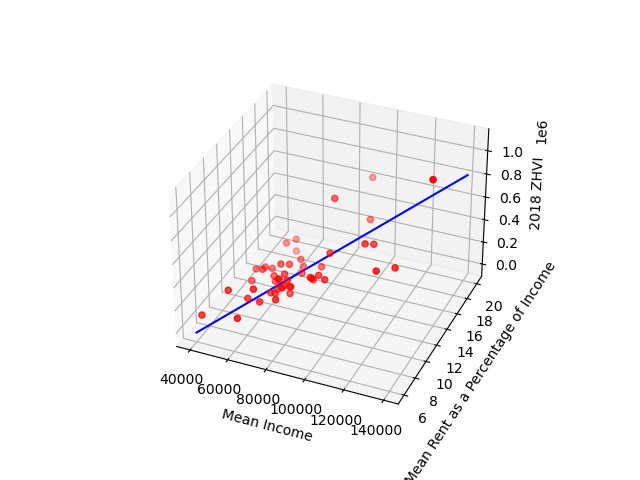

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

twoDModel = LinearRegression()
twoDModel.fit(msazhvi[['Mean Income', 'Mean Rent as a Percentage of Income']], msazhvi['2018 ZHVI'])

inc_pred = np.linspace(40000, 140000, 200)
RPI_pred = np.linspace(6, 20, 200)

x, y = np.meshgrid(inc_pred, RPI_pred)

samples = pd.DataFrame({'Income':inc_pred, 'RPI':RPI_pred})

#samples = pd.DataFrame({'Income':x, 'RPI':y})

pred = twoDModel.predict(samples)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(msazhvi['Mean Income'], msazhvi['Mean Rent as a Percentage of Income'], msazhvi['2018 ZHVI'], c='r')
ax.plot(inc_pred, RPI_pred, pred, c='blue')
ax.legend
ax.set_xlabel('Mean Income')
ax.set_ylabel('Mean Rent as a Percentage of Income')
ax.set_zlabel('2018 ZHVI')

plt.show()

In [16]:
msazhvi

,RegionName,2018 ZHVI,Mean HS/Equivalent Educated,Mean Bachelor's Degree Holding,Mean Postgraduate Educated,Mean Income,Mean Property Tax,Mean Rent as a Percentage of Income,Education Score,Predictions,Difference
1,"New York, NY",4.702898e+05,0.194727,0.181194,0.123487,97918.579350,4080.629834,16.965818,0.804896,505000.015479,-34710.182145
2,"Los Angeles-Long Beach-Anaheim, CA",6.584842e+05,0.163148,0.166903,0.083846,91473.680944,2495.099228,19.548604,0.656419,524220.019581,134264.147086
3,"Chicago, IL",2.363690e+05,0.196159,0.170818,0.105563,84038.028714,3621.713256,11.552303,0.746426,298907.126671,-62538.126671
4,"Dallas-Fort Worth, TX",2.402137e+05,0.178769,0.159131,0.083052,83355.597543,2734.003335,13.185533,0.656225,327959.613577,-87745.946911
6,"Houston, TX",2.076934e+05,0.182125,0.140816,0.077357,75547.037009,2507.561749,12.354341,0.613515,258656.279059,-50962.862392
7,"Washington, DC",4.165819e+05,0.141638,0.198190,0.184021,123028.151092,2998.814976,12.758984,0.921629,612059.799458,-195477.882792
8,"Miami-Fort Lauderdale, FL",2.871426e+05,0.207246,0.162260,0.099602,60800.129049,1837.925430,14.352038,0.728399,275265.971446,11876.611887
9,"Atlanta, GA",2.218861e+05,0.189890,0.171760,0.101076,81266.775866,1559.728686,11.909968,0.731531,341079.204141,-119193.120808
10,"Boston, MA",4.790218e+05,0.172954,0.204811,0.165631,108235.822458,3530.419099,14.053450,0.922565,546104.934814,-67083.184814
11,"San Francisco, CA",1.103116e+06,0.130278,0.234833,0.158303,136294.213613,3939.445843,14.528505,0.917072,699807.711716,403308.704950
